<a href="https://colab.research.google.com/github/akutayaydin/Magnimind-5.1-DeepLearning/blob/main/7_GenderIDTransfLearn_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `list_attr_celeba` Dataset
A popular component of computer vision and deep learning revolves around identifying faces for various applications from logging into your phone with your face or searching through surveillance images for a particular suspect. This dataset is great for training and testing models for face detection, particularly for recognising facial attributes such as finding people with brown hair, are smiling, or wearing glasses. Images cover large pose variations, background clutter, diverse people, supported by a large quantity of images and rich annotations. This data was originally collected by researchers at MMLAB, The Chinese University of Hong Kong (specific reference in Acknowledgment section).



- 202,599 number of face images of various celebrities
- 10,177 unique identities, but names of identities are not given
- 40 binary attribute annotations per image

You can obtain the dataset from https://www.kaggle.com/jessicali9530/celeba-dataset

In [ ]:
#Identify Gender of the Picture

In [ ]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras.utils as image
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
mypath='/content/gdrive/My Drive/Google Colab Folder/celeb_small'
print(os.listdir(mypath))

['list_attr_celeba.csv', '.ipynb_checkpoints', 'list_attr_celeba 2.csv', 'train', 'test', 'validation']


In [ ]:
mypath_traindata = '/content/gdrive/My Drive/Google Colab Folder/celeb_small/train'
mypath_validationdata = '/content/gdrive/My Drive/Google Colab Folder/celeb_small/validation'
mypath_testdata = '/content/gdrive/My Drive/Google Colab Folder/celeb_small/test'

### 4. Build Model

- First, copy VGG16 without the dense layers, use the weights from `imagenet`. Set the input shape to `(178,218,3)`.
- Freeze the layers except the last two layers and print to see if the layers are trainable or not.
- Build your sequential model (you are free to use a functioanl API as a further exercise). Include all the frozen VGG layers to your model. Add a Dense layer with 128 inouts and `relu` activation. Add a batch nomalizer, then a dense layer as the output layer. 
- Create an early stopping criteria monitorin the loss value for the validation set. Stop the search if the loss value deosnt change for two consecutive times.
- Compile the model.
- Save the best model automatically based on the performance of the validation set.

In [ ]:
#Initiate the model

vgg_model = keras.applications.vgg16.VGG16()

In [ ]:
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#Remove the last layer
#Remove the last layer of predictions from the model.
last_layer = str(vgg_model.layers[-1])

In [ ]:
last_layer

'<keras.layers.core.dense.Dense object at 0x7f3a66743a00>'

In [ ]:
#Create a new Keras model of the sequential class and iterate through all the layers of the VGG model. 
#Add all of them to the new model, except for the last layer

In [ ]:
model = keras.Sequential()

In [ ]:
for layer in vgg_model.layers:
  if str(layer) != last_layer:
    model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
#Freeze the layers to cut down on the computational time for training while losing not much on the accuracy side

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
#Add a new output layer of size 1 with a sigmoid activation function and print the model summary

In [ ]:
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
#Compile the network with an adam optimizer and binary cross-entropy loss and compute the accuracy during training

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy',metrics =['accuracy'] )

In [ ]:
# Create the data generators
#Create some training and test data generators. 
#Rescale the training and test images by 1/255 so that all the values are between 0 and 1. 
#Set the following parameters for the training data generators only: shear_range=0.2, zoom_range=0.2, and horizontal_flip=True.
#Next, create a training set from the training set folder. 
#Our CNN model has an image size of 178X218, so the same size should be passed here too.
# batch_size is the number of images in a single batch, which is 32. class_mode is binary since we are creating a binary classifier

## 5. Data Preparation

- Create a validation set with 20% of the data. Check the number of data points per class from both the train and validation sets.
- Set your batch size to 20.
- Create the data generator and set the `preprocessing_function` to `preprocess_input` of VGG16.
- Create train and validation data generators (batches will be picked up from the dataframe). Set target size to (178,218) (you can try something else, but you need to do the corresponding change in the model).
- Set your validation  and epoch step size (`validation_steps` and `steps_per_epoch`)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range =0.2,
                                         horizontal_flip = True)


generate_validation_data = ImageDataGenerator(rescale = 1./255)

#Question: Image size'i 178,218 yapinca hata aliyorum bu sebeple 224,224 olark guncelledim. reshape yapilarak guncellenebilir mi? 
training_dataset = generate_train_data.flow_from_directory('/content/gdrive/My Drive/Google Colab Folder/celeb_small/train',
                                                           #target_size = (178,218),
                                                           target_size = (224,224),
                                                           batch_size = 32,
                                                           class_mode ='binary')

validation_dataset = generate_validation_data.flow_from_directory('/content/gdrive/My Drive/Google Colab Folder/celeb_small/validation',
                                                                  target_size = (224,224),
                                                                  batch_size =32,
                                                                  class_mode = 'binary')


Found 2900 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
#Fit the classifier 

STEP_SIZE_TRAIN = training_dataset.n //training_dataset.batch_size
STEP_SIZE_VALIDATION = validation_dataset.n // validation_dataset.batch_size

In [ ]:
STEP_SIZE_TRAIN, STEP_SIZE_VALIDATION

(90, 12)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

In [ ]:
cp_callback = keras.callbacks.ModelCheckpoint(filepath=mypath,
                                                 save_weights_only=True,
                                                 verbose=1)

## 6. Train the Model

- Fit the model
- save the model

In [ ]:
history2 = model.fit(training_dataset,
          steps_per_epoch = 2,
          epochs =5,
          validation_data = validation_dataset,
          validation_steps = STEP_SIZE_VALIDATION,
          callbacks =[cp_callback,earlystop,reduce_lr])

Epoch 1/5
2/2 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.6719 
Epoch 1: saving model to /content/gdrive/My Drive/Google Colab Folder/celeb_small
2/2 [==============================] - 307s 288s/step - loss: 0.5690 - accuracy: 0.6719 - val_loss: 0.5509 - val_accuracy: 0.7630 - lr: 0.0010
Epoch 2/5
2/2 [==============================] - ETA: 0s - loss: 0.5090 - accuracy: 0.7969 
Epoch 2: saving model to /content/gdrive/My Drive/Google Colab Folder/celeb_small
2/2 [==============================] - 307s 288s/step - loss: 0.5090 - accuracy: 0.7969 - val_loss: 0.5480 - val_accuracy: 0.7474 - lr: 0.0010
Epoch 3/5
2/2 [==============================] - ETA: 0s - loss: 0.5630 - accuracy: 0.7344 
Epoch 3: saving model to /content/gdrive/My Drive/Google Colab Folder/celeb_small
2/2 [==============================] - 267s 241s/step - loss: 0.5630 - accuracy: 0.7344 - val_loss: 0.5351 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 4/5
2/2 [==============================] - 

In [ ]:
history = model.fit(training_dataset,
          steps_per_epoch = 5,
          epochs =5,
          validation_data = validation_dataset,
          validation_steps = STEP_SIZE_VALIDATION,
          callbacks =[earlystop,reduce_lr])

Epoch 1/5
5/5 [==============================] - 305s 73s/step - loss: 0.7573 - accuracy: 0.5270 - val_loss: 0.6763 - val_accuracy: 0.5130 - lr: 0.0010
Epoch 2/5
5/5 [==============================] - 354s 84s/step - loss: 0.6664 - accuracy: 0.5562 - val_loss: 0.6379 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 3/5
5/5 [==============================] - 352s 83s/step - loss: 0.6277 - accuracy: 0.6000 - val_loss: 0.5960 - val_accuracy: 0.7734 - lr: 0.0010
Epoch 4/5
5/5 [==============================] - 352s 84s/step - loss: 0.6240 - accuracy: 0.6187 - val_loss: 0.5870 - val_accuracy: 0.7214 - lr: 0.0010
Epoch 5/5
5/5 [==============================] - 299s 70s/step - loss: 0.5799 - accuracy: 0.7000 - val_loss: 0.5960 - val_accuracy: 0.6328 - lr: 0.0010


In [ ]:
model.save(str(mypath) + "genderidtransferlearn.h5")
print("Saved model to disk")

Saved model to disk


#### See sample image

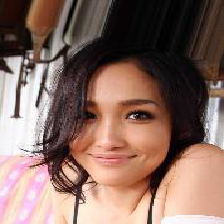

In [ ]:
new_image = image.load_img('/content/gdrive/My Drive/Google Colab Folder/celeb_small/test/female030532.jpg', target_size = (224, 224))
new_image


In [ ]:
new_image = image.img_to_array(new_image)

new_image = np.expand_dims(new_image, axis = 0)
# reshape data for the model
#transformed_image = transformed_image.reshape((1, transformed_image.shape[0], transformed_image.shape[1], transformed_image.shape[2]))

result = model.predict(new_image)

1/1 [==============================] - 2s 2s/step


In [ ]:
label_map = dict((v,k) for k,v in training_dataset.class_indices.items())

In [ ]:
label_map

{0: 'female', 1: 'man'}

In [ ]:
if result[0][0] > 0.5:

    prediction = 'It is a man'

else:

    prediction = 'It is a female'

print(prediction)

It is a female
